# Data Cleaning - Tidy up messy JSON Datasets 

## First Steps 

1. __Load__ and __inspect__ the messy dataset __movies_metadata.csv__. Identify columns with nested / stringified json data.

In [1]:
import pandas as pd
import ast
import numpy as np
import json
pd.options.display.max_columns = 30

In [2]:
#We have a few columns that are a little bit messy
df = pd.read_csv('movies_metadata.csv', low_memory=False)
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
#Here we have a list of dictionaries with WRONG MARKS ('""')
df['genres'][0]

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [4]:
#Here we have big dictionaries
df['belongs_to_collection'][0]

"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}"

## Dropping irrelevant Columns

2. __Drop__ the irrelevant columns 'adult', 'imdb_id', 'original_title', 'video' and 'homepage'.

In [5]:
df.drop(columns=['adult','imdb_id','original_title','video','homepage'],inplace = True)

## How to handle stringified JSON columns

3. __ Let´s Evaluate__ Python Expressions in the stringified columns ["belongs_to_collection", "genres", "production_countries", "production_companies", "spoken_languages"] and __remove quotes__ ("") where possible. That´s because the correct format for json dictionaries should be __json1 = '{"dog":5, "cat":3}'__ not __json1 = "{'dog':3,'cat':5}"__

In [6]:
#For that we can use the replace method 
json2 = "{'dog':3,'cat':5}"

In [7]:
json.loads(json2.replace("'",'"'))

{'dog': 3, 'cat': 5}

## Let´s FIX the GENRES colum marks ("''")

In [8]:
df['genres'].apply(lambda x: x.replace("'",'"'))[0]

'[{"id": 16, "name": "Animation"}, {"id": 35, "name": "Comedy"}, {"id": 10751, "name": "Family"}]'

## Let´s FIX the GENRES colum marks ("''") with AST method

In [9]:
#With this method we can have the json in the correct format
ast.literal_eval(json2)

{'dog': 3, 'cat': 5}

In [10]:
df['genres'].apply(ast.literal_eval)

0        [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1        [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2        [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3        [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4                           [{'id': 35, 'name': 'Comedy'}]
                               ...                        
45461    [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...
45462                        [{'id': 18, 'name': 'Drama'}]
45463    [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...
45464                                                   []
45465                                                   []
Name: genres, Length: 45466, dtype: object

In [11]:
#These are the columns that requiere formatting
json_cols = ['belongs_to_collection','genres','production_companies','production_countries','spoken_languages']

In [12]:
#ERROR malformed node or string: 0. There is a value that is not letting us fix this.
df.loc[:,json_cols].apply(ast.literal_eval)

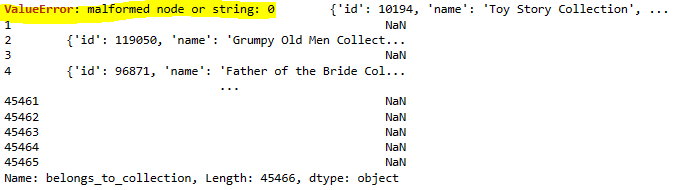

### Let´s use isinistance to avoid this problem!

 __ With this we can check if the values in a a row are str or not, and if that is the case we can do else np.nan!__

In [13]:
df['belongs_to_collection'].apply(lambda x: ast.literal_eval(x) if isinstance(x,str) else np.nan)

0        {'id': 10194, 'name': 'Toy Story Collection', ...
1                                                      NaN
2        {'id': 119050, 'name': 'Grumpy Old Men Collect...
3                                                      NaN
4        {'id': 96871, 'name': 'Father of the Bride Col...
                               ...                        
45461                                                  NaN
45462                                                  NaN
45463                                                  NaN
45464                                                  NaN
45465                                                  NaN
Name: belongs_to_collection, Length: 45466, dtype: object

In [14]:
#Let´s do this for every column
for col in json_cols:
    df[col] = df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x,str) else np.nan)

In [15]:
#We have fixed the marks with this method
df.head()

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,5415.0
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0
3,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0


## How to flatten nested Columns

4. __Extract__ only the __collection name__ from the column "belongs_to_collection" and __overwrite__ "belongs_to_collection". <br> For example: The value in the first row (Toy Story) should be 'Toy Story Collection'.

In [16]:
#From this dictionary we want to extract to name.
df['belongs_to_collection'][0]

{'id': 10194,
 'name': 'Toy Story Collection',
 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg',
 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}

In [17]:
#We have to be aware of what we have in each row (list or dic)
df['belongs_to_collection'] = df['belongs_to_collection'].apply(lambda x: x['name'] if isinstance(x,dict) else np.nan)

In [18]:
#Here we want to have for this row this: Animation|Comedy|Family
df['genres'][0]

[{'id': 16, 'name': 'Animation'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 10751, 'name': 'Family'}]

In [19]:
df['genres'] = df['genres'].apply(lambda x: "|".join(i['name'] for i in x) if isinstance(x,list) else np.nan)

In [20]:
df['production_companies'] = df['production_companies'].apply(lambda x: "|".join(i['name'] for i in x) if isinstance(x,list) else np.nan)

In [21]:
df['production_countries'] = df['production_countries'].apply(lambda x: "|".join(i['name'] for i in x) if isinstance(x, list) else np.nan)

In [22]:
df['spoken_languages'] = df['spoken_languages'].apply(lambda x: "|".join(i['name'] for i in x) if isinstance(x,list) else np.nan)

## FIXING EMPTY ROWS AND VALUES

In [23]:
df['belongs_to_collection'].value_counts(dropna=False)

NaN                              40975
The Bowery Boys                     29
Totò Collection                     27
James Bond Collection               26
Zatôichi: The Blind Swordsman       26
                                 ...  
Glass Tiger collection               1
Kathleen Madigan Collection          1
The Big Bottom Box                   1
Joséphine - Saga                     1
Red Lotus Collection                 1
Name: belongs_to_collection, Length: 1696, dtype: int64

In [24]:
#We can see that there are empty rows
df['genres'].value_counts(dropna=False)

Drama                              5000
Comedy                             3621
Documentary                        2723
                                   2442
Drama|Romance                      1301
                                   ... 
Action|Drama|Comedy|Documentary       1
War|Drama|History|Thriller            1
Horror|Drama|History|Thriller         1
Comedy|Crime|Action|Drama             1
Family|Animation|Romance|Comedy       1
Name: genres, Length: 4069, dtype: int64

In [25]:
df['genres'].replace('',np.nan,inplace=True)

In [26]:
df['production_companies'].value_counts(dropna = False)

                                                                                                                                              11875
Metro-Goldwyn-Mayer (MGM)                                                                                                                       742
Warner Bros.                                                                                                                                    540
Paramount Pictures                                                                                                                              505
Twentieth Century Fox Film Corporation                                                                                                          439
                                                                                                                                              ...  
HBO Films|Moving Pictures                                                                                       

In [27]:
df['production_companies'].replace('',np.nan,inplace=True)

In [28]:
df['production_companies'].value_counts()

Metro-Goldwyn-Mayer (MGM)                                                                                                                     742
Warner Bros.                                                                                                                                  540
Paramount Pictures                                                                                                                            505
Twentieth Century Fox Film Corporation                                                                                                        439
Universal Pictures                                                                                                                            320
                                                                                                                                             ... 
HBO Films|Moving Pictures                                                                                                   

In [29]:
df['production_countries'].value_counts(dropna = False)

United States of America                  17851
                                           6282
United Kingdom                             2238
France                                     1654
Japan                                      1356
                                          ...  
Romania|United Kingdom|Canada                 1
Finland|Germany|Netherlands                   1
France|Denmark|Spain|Sweden                   1
France|United States of America|Canada        1
Egypt|Italy|United States of America          1
Name: production_countries, Length: 2391, dtype: int64

In [30]:
df['production_countries'].replace('',np.nan,inplace=True)

In [31]:
df['production_countries'].value_counts()

United States of America                  17851
United Kingdom                             2238
France                                     1654
Japan                                      1356
Italy                                      1030
                                          ...  
Romania|United Kingdom|Canada                 1
Finland|Germany|Netherlands                   1
France|Denmark|Spain|Sweden                   1
France|United States of America|Canada        1
Egypt|Italy|United States of America          1
Name: production_countries, Length: 2389, dtype: int64

In [32]:
df['spoken_languages'].value_counts(dropna=False)

English                           22395
                                   3952
Français                           1853
日本語                                1289
Italiano                           1218
                                  ...  
English|日本語|Latin                     1
Deutsch||ελληνικά|English             1
English|suomi|Deutsch|svenska         1
English|Français|Deutsch|فارسی        1
Fulfulde|English                      1
Name: spoken_languages, Length: 1843, dtype: int64

In [33]:
df['spoken_languages'].replace('',np.nan,inplace=True)

In [34]:
df['spoken_languages'].value_counts()

English                           22395
Français                           1853
日本語                                1289
Italiano                           1218
Español                             902
                                  ...  
Deutsch||ελληνικά|English             1
English|suomi|Deutsch|svenska         1
English|Français|Deutsch|فارسی        1
svenska|English|Español               1
Fulfulde|English                      1
Name: spoken_languages, Length: 1841, dtype: int64

## Cleaning Numerical Columns

5. __Convert__ the datatype in the columns __"budget"__, __"id"__ and __"popularity"__ __to numeric__. Set invalid values as NaN.

In [35]:
#We cant convert this because in a cell for budget there is an image??? WTF '/ff9qCepilowshEtG2GYWwzt2bs4.jpg'
df['budget'].astype(float)

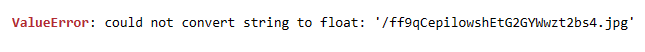

In [36]:
#How to get the indexes of the jpg rows
for index,value in enumerate(df['budget']):
    if value.endswith('jpg'):
        print(f'the index is {index} and the value is {value}')

the index is 19730 and the value is /ff9qCepilowshEtG2GYWwzt2bs4.jpg
the index is 29503 and the value is /zV8bHuSL6WXoD6FWogP9j4x80bL.jpg
the index is 35587 and the value is /zaSf5OG7V8X8gqFvly88zDdRm46.jpg


In [37]:
#How to get the indexes of the jpg rows part 2
df[df['budget'].str.endswith('jpg')].index

Int64Index([19730, 29503, 35587], dtype='int64')

In [38]:
#Thank god, we have this method to convert into NAN the invalid values
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')

In [39]:
#Let´s replace the Nan values with 0
df['budget'] = df['budget'].replace(np.nan, 0)

In [40]:
#Lets div by 1 mill to have the budget in Millions of Dolars
df['budget']  = df['budget'].div(1000000)

In [41]:
df['revenue'].replace(0,np.nan)
df['revenue']  = df['revenue'].div(1000000)

In [42]:
df.rename(columns={'revenue':'revenue_musd','budget':'budget_musd'}, inplace = True)

6. __Analyze runtime__ movies with a __vote_count of 0__. What´s the __vote_average__ for those movies? Do you think this value is the most appropriate value? __Take reasonable measures__!

In [43]:
#0 has no meaning, so we should transform it into a NAN
df['runtime'].value_counts(dropna = False)

90.0     2556
0.0      1558
100.0    1470
95.0     1412
93.0     1214
         ... 
410.0       1
283.0       1
238.0       1
566.0       1
780.0       1
Name: runtime, Length: 354, dtype: int64

In [44]:
df['runtime'].replace(0,np.nan, inplace = True)

In [45]:
df['id'] = pd.to_numeric(df['id'],errors='coerce')

In [46]:
df['popularity'] = pd.to_numeric(df['popularity'],errors='coerce')

In [47]:
#Here is actually correct that there are movies with 0 popularity
df['popularity'].value_counts(dropna=False)

0.000000    66
0.000001    56
0.000308    43
0.000220    40
0.000844    38
            ..
4.762242     1
6.173752     1
0.645652     1
0.556292     1
0.163015     1
Name: popularity, Length: 43758, dtype: int64

In [48]:
#Here we think that votes with 0 average are unknown so we turn them into NAN
df.loc[df['vote_count'] == 0,'vote_average'] = np.nan

## Cleaning DateTime Columns

7. __Convert__ the datatype in the column __"release_date"__ __to datetime__. Set invalid values as NaN.

In [49]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

In [50]:
df['release_date'].value_counts(dropna = False)

2008-01-01    136
2009-01-01    121
2007-01-01    118
2005-01-01    111
2006-01-01    101
             ... 
1957-09-26      1
1938-11-21      1
1936-08-19      1
2010-01-27      1
1917-10-21      1
Name: release_date, Length: 17334, dtype: int64

## Cleaning Text / String Columns

8. __Analyze__ the text columns "overview" and "tagline". Try to identify __missing data that is not represented by NaN__ (e.g. "No Data"). __Replace as NaN__ (np.nan)!

In [51]:
df['overview'].value_counts(dropna = False).head(20)

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              954
No overview found.                                                                                                                                                 

In [52]:
#Let´s convert this values into NAN
df.overview.replace("No overview found.", np.nan, inplace = True)
df.overview.replace("No Overview", np.nan, inplace = True)
df.overview.replace("No movie overview available.", np.nan, inplace = True)
df.overview.replace(" ", np.nan, inplace = True)
df.overview.replace("No overview yet.", np.nan, inplace = True)

In [53]:
df.tagline.replace("-", np.nan, inplace = True)

## Removing Duplicates

11. __Identify__ and __remove__ duplicates!

In [54]:
#We will remove rows with the same id
df[df.duplicated(keep = False)].sort_values(by='id')

,belongs_to_collection,budget_musd,genres,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue_musd,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
7345,NaN,0.00,Crime|Drama|Thriller,5511.0,fr,Hitman Jef Costello is a perfectionist who alw...,9.091288,/cvNW8IXigbaMNo4gKEIps0NGnhA.jpg,Fida cinematografica|Compagnie Industrielle et...,France|Italy,1967-10-25,0.039481,105.0,Français,Released,There is no solitude greater than that of the ...,Le Samouraï,7.9,187.0
9165,NaN,0.00,Crime|Drama|Thriller,5511.0,fr,Hitman Jef Costello is a perfectionist who alw...,9.091288,/cvNW8IXigbaMNo4gKEIps0NGnhA.jpg,Fida cinematografica|Compagnie Industrielle et...,France|Italy,1967-10-25,0.039481,105.0,Français,Released,There is no solitude greater than that of the ...,Le Samouraï,7.9,187.0
24844,NaN,0.00,Comedy|Drama,11115.0,en,As an ex-gambler teaches a hot-shot college ki...,6.880365,/kHaBqrrozaG7rj6GJg3sUCiM29B.jpg,Andertainment Group|Crescent City Pictures|Tag...,United States of America,2008-01-29,0.000000,85.0,English,Released,NaN,Deal,5.2,22.0
14012,NaN,0.00,Comedy|Drama,11115.0,en,As an ex-gambler teaches a hot-shot college ki...,6.880365,/kHaBqrrozaG7rj6GJg3sUCiM29B.jpg,Andertainment Group|Crescent City Pictures|Tag...,United States of America,2008-01-29,0.000000,85.0,English,Released,NaN,Deal,5.2,22.0
22151,NaN,0.00,Action|Horror|Science Fiction,18440.0,en,When a comet strikes Earth and kicks up a clou...,1.436085,/tWCyKXHuSrQdLAvNeeVJBnhf1Yv.jpg,NaN,United States of America,2007-01-01,0.000000,89.0,English,Released,NaN,Days of Darkness,5.0,5.0
14000,NaN,0.00,Action|Horror|Science Fiction,18440.0,en,When a comet strikes Earth and kicks up a clou...,1.436085,/tWCyKXHuSrQdLAvNeeVJBnhf1Yv.jpg,NaN,United States of America,2007-01-01,0.000000,89.0,English,Released,NaN,Days of Darkness,5.0,5.0
8068,NaN,0.00,Adventure|Animation|Drama|Action|Foreign,23305.0,en,"In feudal India, a warrior (Khan) who renounce...",1.967992,/9GlrmbZO7VGyqhaSR1utinRJz3L.jpg,Filmfour,France|Germany|India|United Kingdom,2001-09-23,0.000000,86.0,हिन्दी,Released,NaN,The Warrior,6.3,15.0
9327,NaN,0.00,Adventure|Animation|Drama|Action|Foreign,23305.0,en,"In feudal India, a warrior (Khan) who renounce...",1.967992,/9GlrmbZO7VGyqhaSR1utinRJz3L.jpg,Filmfour,France|Germany|India|United Kingdom,2001-09-23,0.000000,86.0,हिन्दी,Released,NaN,The Warrior,6.3,15.0
17229,NaN,0.00,Drama,25541.0,da,Former Danish servicemen Lars and Jimmy are th...,2.587911,/q19Q5BRZpMXoNCA4OYodVozfjUh.jpg,NaN,Sweden|Denmark,2009-10-21,0.000000,90.0,Dansk,Released,NaN,Brotherhood,7.1,21.0
23044,NaN,0.00,Drama,25541.0,da,Former Danish servicemen Lars and Jimmy are th...,2.587911,/q19Q5BRZpMXoNCA4OYodVozfjUh.jpg,NaN,Sweden|Denmark,2009-10-21,0.000000,90.0,Dansk,Released,NaN,Brotherhood,7.1,21.0


In [55]:
df.drop_duplicates(inplace = True)

## Handling Missing Values & Removing Observations

10. __Drop__ all rows/movies with unknown __id__ or __title__.

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45449 entries, 0 to 45465
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  4490 non-null   object        
 1   budget_musd            45449 non-null  float64       
 2   genres                 43007 non-null  object        
 3   id                     45446 non-null  float64       
 4   original_language      45438 non-null  object        
 5   overview               44345 non-null  object        
 6   popularity             45443 non-null  float64       
 7   poster_path            45063 non-null  object        
 8   production_companies   33573 non-null  object        
 9   production_countries   39164 non-null  object        
 10  release_date           45359 non-null  datetime64[ns]
 11  revenue_musd           45443 non-null  float64       
 12  runtime                43628 non-null  float64       
 13  s

In [57]:
df[df['title'].isna()]

,belongs_to_collection,budget_musd,genres,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue_musd,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
19729,NaN,0.0,Action|Thriller|Drama,82663.0,en,British soldiers force a recently captured IRA...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19730,NaN,0.0,Carousel Productions|Vision View Entertainment...,NaN,104.0,Released,NaN,Midnight Man,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29502,Mardock Scramble Collection,0.0,Animation|Science Fiction,122662.0,ja,Third film of the Mardock Scramble series.,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,NaN,0.0,Aniplex|GoHands|BROSTA TV|Mardock Scramble Pro...,NaN,68.0,Released,NaN,Mardock Scramble: The Third Exhaust,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35586,NaN,0.0,TV Movie|Action|Horror|Science Fiction,249260.0,en,A group of skiers are terrorized during spring...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,NaN,0.0,Odyssey Media|Pulser Productions|Rogue State|T...,NaN,82.0,Released,NaN,Avalanche Sharks,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
df.dropna(subset=['id','title'], inplace = True)

In [59]:
df['id'] = df['id'].astype('int')

In [60]:
df.notna().sum(axis=1).value_counts().sort_values(ascending = False)

18    15951
17    14337
16     5818
15     3133
19     2381
14     1945
13     1047
12      514
11      187
10      106
9        20
8         4
dtype: int64

12. __Keep__ only those rows/movies in the df with __10 or more non-NaN__ values.

In [61]:
df.dropna(thresh=10, inplace = True)

## Final (Cleaning) Steps

13. __Keep__ only those rows/movies in the df with __status "Released"__. Then __drop__ the column "status".

In [62]:
df['status'].value_counts()

Released           44977
Rumored              229
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: status, dtype: int64

In [63]:
df = df.loc[df['status'] == 'Released'].copy()

In [64]:
df.drop(columns='status', inplace= True)

14. The Order of the columns should be as follows: 

In [65]:
df_col = ["id", "title", "tagline", "release_date", "genres", "belongs_to_collection", 
"original_language", "budget_musd", "revenue_musd", "production_companies",
"production_countries", "vote_count", "vote_average", "popularity", "runtime",
"overview", "spoken_languages", "poster_path"]

In [66]:
df = df.loc[:,df_col]

In [67]:
df.reset_index(inplace = True)

In [68]:
df.head()

,index,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path
0,0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.0,373.554033,Pixar Animation Studios,United States of America,5415.0,7.7,21.946943,81.0,"Led by Woody, Andy's toys live happily in his ...",English,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg
1,1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.0,262.797249,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,2413.0,6.9,17.015539,104.0,When siblings Judy and Peter discover an encha...,English|Français,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg
2,2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,0.0,0.000000,Warner Bros.|Lancaster Gate,United States of America,92.0,6.5,11.712900,101.0,A family wedding reignites the ancient feud be...,English,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg
3,3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,1995-12-22,Comedy|Drama|Romance,NaN,en,16.0,81.452156,Twentieth Century Fox Film Corporation,United States of America,34.0,6.1,3.859495,127.0,"Cheated on, mistreated and stepped on, the wom...",English,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg
4,4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,1995-02-10,Comedy,Father of the Bride Collection,en,0.0,76.578911,Sandollar Productions|Touchstone Pictures,United States of America,173.0,5.7,8.387519,106.0,Just when George Banks has recovered from his ...,English,/e64sOI48hQXyru7naBFyssKFxVd.jpg
